# 필요 라이브러리

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

plt.rcParams['font.family'] ='Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic' # 맥
plt.rcParams['axes.unicode_minus'] =False

Matplotlib is building the font cache; this may take a moment.


# 지역별 범죄 현황 분석

In [2]:
df = pd.read_csv('범죄_발생지.csv', header=1)

theft = df.iloc[11] # 절도 범죄 df 추가

theft_df = pd.DataFrame(theft)
theft_df = theft_df.iloc[3:]
theft_df = theft_df.rename(columns = {11 : '절도'})

# 분석에 필요 없는 데이터 제거
df = df.drop(['죄종별(1)', '계'], axis = 1).T
df = df.rename(columns = df.iloc[0]).drop(df.index[0])
df = df.drop(['소계', '죄종별(2)'], axis = 1)

df

,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간·강제추행등,방화,상해,폭행,...,직권남용,증수뢰,통화,문서・인장,유가증권인지,사기,횡령,배임,성풍속범죄,도박범죄
서울,35,68,118,1200,219,4358,35,217,3353,26509,...,392,71,172,2033,25,52034,16368,791,4924,545
부산,29,24,43,347,83,1064,14,89,2478,8474,...,156,17,20,897,7,26847,4469,273,1602,384
대구,16,15,31,215,43,648,9,50,1568,5629,...,47,7,27,459,3,14836,2643,106,1125,138
인천,14,38,30,340,61,1030,16,70,1545,8040,...,78,21,29,581,-,16652,4175,184,1507,239
광주,1,2,10,152,32,391,8,35,641,3430,...,64,11,10,319,1,8249,1666,112,577,102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
경상남도.7,-,1,5,19,4,38,2,5,134,334,...,5,-,-,28,-,1193,117,9,39,9
제주특별자치도,1,4,1,17,8,84,-,9,213,625,...,4,-,-,35,-,1599,225,12,82,13
제주특별자치도.1,3,4,4,78,13,201,3,20,351,2169,...,19,1,2,146,1,3996,646,52,216,49
기타도시,4,1,1,18,3,18,1,-,16,53,...,58,11,12,626,2,25191,993,176,786,110


In [3]:
# 절도 범죄 + 전국 범죄 데이터
df = pd.concat([df, theft_df], axis = 1)
df = df.replace('-', 0).astype('int')  # '-' 표시된 곳 0 처리 후 타입 수치형으로 변경

df

,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간·강제추행등,방화,상해,폭행,...,증수뢰,통화,문서・인장,유가증권인지,사기,횡령,배임,성풍속범죄,도박범죄,절도
서울,35,68,118,1200,219,4358,35,217,3353,26509,...,71,172,2033,25,52034,16368,791,4924,545,37594
부산,29,24,43,347,83,1064,14,89,2478,8474,...,17,20,897,7,26847,4469,273,1602,384,13699
대구,16,15,31,215,43,648,9,50,1568,5629,...,7,27,459,3,14836,2643,106,1125,138,9792
인천,14,38,30,340,61,1030,16,70,1545,8040,...,21,29,581,0,16652,4175,184,1507,239,8895
광주,1,2,10,152,32,391,8,35,641,3430,...,11,10,319,1,8249,1666,112,577,102,5204
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
경상남도.7,0,1,5,19,4,38,2,5,134,334,...,0,0,28,0,1193,117,9,39,9,387
제주특별자치도,1,4,1,17,8,84,0,9,213,625,...,0,0,35,0,1599,225,12,82,13,886
제주특별자치도.1,3,4,4,78,13,201,3,20,351,2169,...,1,2,146,1,3996,646,52,216,49,2247
기타도시,4,1,1,18,3,18,1,0,16,53,...,11,12,626,2,25191,993,176,786,110,43


In [4]:
df.index

Index(['서울', '부산', '대구', '인천', '광주', '대전', '울산', '세종', '경기도', '경기도.1', '경기도.2',
       '경기도.3', '경기도.4', '경기도.5', '경기도.6', '경기도.7', '경기도.8', '경기도.9', '경기도.10',
       '경기도.11', '경기도.12', '경기도.13', '경기도.14', '경기도.15', '경기도.16', '경기도.17',
       '경기도.18', '경기도.19', '경기도.20', '경기도.21', '경기도.22', '경기도.23', '경기도.24',
       '경기도.25', '경기도.26', '경기도.27', '강원도', '강원도.1', '강원도.2', '강원도.3', '강원도.4',
       '강원도.5', '강원도.6', '충청북도', '충청북도.1', '충청북도.2', '충청남도', '충청남도.1',
       '충청남도.2', '충청남도.3', '충청남도.4', '충청남도.5', '충청남도.6', '충청남도.7', '전라북도',
       '전라북도.1', '전라북도.2', '전라북도.3', '전라북도.4', '전라북도.5', '전라남도', '전라남도.1',
       '전라남도.2', '전라남도.3', '전라남도.4', '경상북도', '경상북도.1', '경상북도.2', '경상북도.3',
       '경상북도.4', '경상북도.5', '경상북도.6', '경상북도.7', '경상북도.8', '경상북도.9', '경상남도',
       '경상남도.1', '경상남도.2', '경상남도.3', '경상남도.4', '경상남도.5', '경상남도.6', '경상남도.7',
       '제주특별자치도', '제주특별자치도.1', '기타도시', '도시이외'],
      dtype='object')

In [5]:
crime_df = df.loc['서울': '세종']  # 별도의 전처리가 필요 없기 때문에 따로 빼 둠

In [6]:
# 시도(cities and provinces) list
cp_list = ['경기도', '강원도', '충청북도', '충청남도', '경상북도', '경상남도', '제주특별자치도']

def cp_rename(df):
    cp_df = pd.DataFrame()
    for name in cp_list:
        re_df = df[df.index.str.contains(name)]
        re_df = re_df.replace('-', 0).astype('int')
        re_df = re_df.sum()
        re_df =  pd.DataFrame(re_df, columns = [name]).T
        cp_df = pd.concat([cp_df, re_df])
    return cp_df

cp_df = cp_rename(df)

# 전라남도, 전라북도는 이상해서 따로
Jeonnam = df[df.index.str.contains('전라남도')]
Jeonnam = Jeonnam.replace('-', 0)
Jeonnam = Jeonnam.astype('int')
Jeonnam = Jeonnam.sum()
Jeonnam = pd.DataFrame(Jeonnam, columns = ['전라남도']).T

Jeonbuk = df[df.index.str.contains('전라북도')]
Jeonbuk = Jeonbuk.replace('-', 0)
Jeonbuk = Jeonbuk.astype('int')
Jeonbuk = Jeonbuk.sum()
Jeonbuk = pd.DataFrame(Jeonbuk, columns = ['전라북도']).T


# 지역 데이터들 전부 합치기
crime_df = pd.concat([crime_df, cp_df, Jeonnam, Jeonbuk])
crime_df

,살인기수,살인미수등,강도,강간,유사강간,강제추행,기타 강간·강제추행등,방화,상해,폭행,...,증수뢰,통화,문서・인장,유가증권인지,사기,횡령,배임,성풍속범죄,도박범죄,절도
서울,35,68,118,1200,219,4358,35,217,3353,26509,...,71,172,2033,25,52034,16368,791,4924,545,37594
부산,29,24,43,347,83,1064,14,89,2478,8474,...,17,20,897,7,26847,4469,273,1602,384,13699
대구,16,15,31,215,43,648,9,50,1568,5629,...,7,27,459,3,14836,2643,106,1125,138,9792
인천,14,38,30,340,61,1030,16,70,1545,8040,...,21,29,581,0,16652,4175,184,1507,239,8895
광주,1,2,10,152,32,391,8,35,641,3430,...,11,10,319,1,8249,1666,112,577,102,5204
대전,6,11,17,200,34,500,2,40,831,4166,...,13,7,336,0,11734,1456,105,733,181,6034
울산,8,7,10,112,14,311,10,28,683,2574,...,7,1,206,0,5615,759,72,449,248,3283
세종,2,3,2,26,6,73,1,8,119,400,...,1,3,70,0,1528,248,13,120,13,1110
경기도,65,97,107,1148,189,3467,51,272,4914,33294,...,73,101,2311,13,69021,15190,764,5710,1380,40974
강원도,10,7,14,131,28,307,8,25,766,2559,...,3,13,240,3,6745,857,63,397,101,3512


## 5대 범죄 - 절도, 성폭력, 살인, 폭력, 강도만 가져오기

In [8]:
crime_df.columns

Index(['살인기수', '살인미수등', '강도', '강간', '유사강간', '강제추행', '기타 강간·강제추행등', '방화', '상해',
       '폭행', '체포・감금', '협박', '약취・유인', '폭력행위등', '공갈', '손괴', '직무유기', '직권남용',
       '증수뢰', '통화', '문서・인장', '유가증권인지', '사기', '횡령', '배임', '성풍속범죄', '도박범죄',
       '절도'],
      dtype='object')

In [9]:
crime_df = crime_df[(['절도', '강간', '살인기수', '폭행', '강도'])]
crime_df

,절도,강간,살인기수,폭행,강도
서울,37594,1200,35,26509,118
부산,13699,347,29,8474,43
대구,9792,215,16,5629,31
인천,8895,340,14,8040,30
광주,5204,152,1,3430,10
대전,6034,200,6,4166,17
울산,3283,112,8,2574,10
세종,1110,26,2,400,2
경기도,40974,1148,65,33294,107
강원도,3512,131,10,2559,14


### 시각화

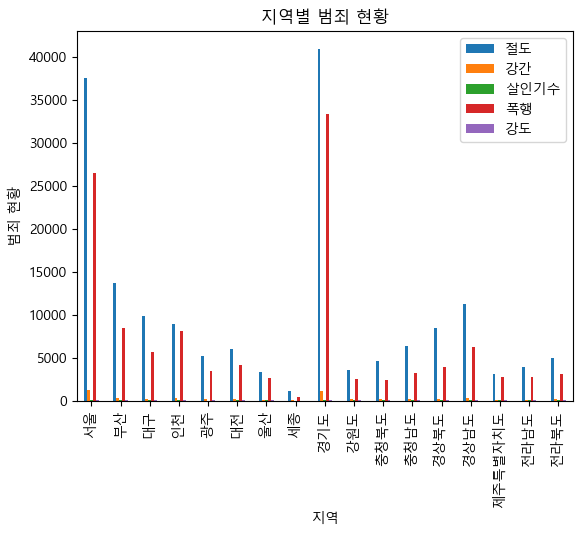

In [150]:
# 지역별 범죄 현황 막대그래프

crime_df.plot(kind = 'bar', figsize=(12, 8));

plt.title('지역별 범죄 현황');
plt.xlabel('지역');
plt.ylabel('범죄 현황');

<Axes: >

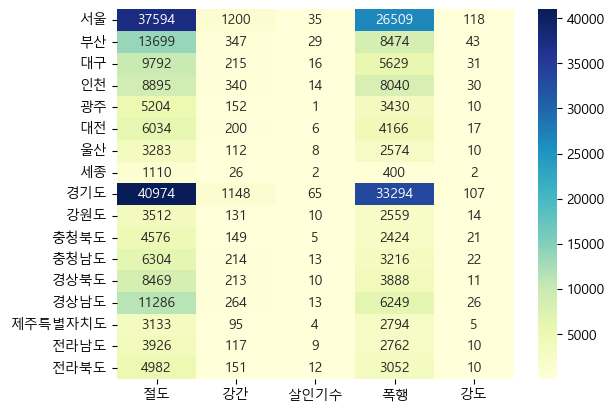

In [11]:
# 히트맵
sns.heatmap(crime_df, cmap='YlGnBu', annot=True, fmt='d')

<Axes: >

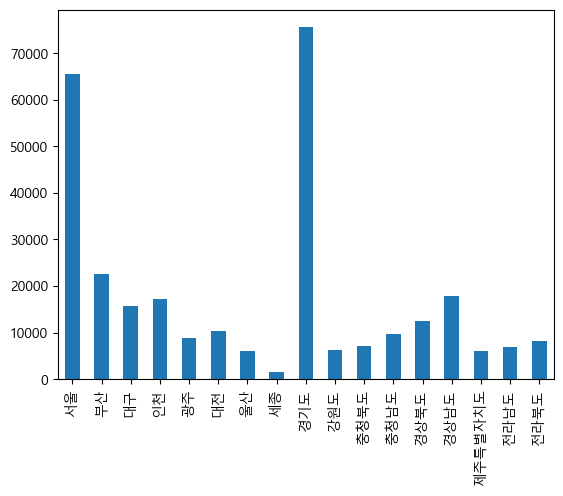

In [12]:
# 지역별 범죄 건수 총합 그래프
total_df = crime_df.sum(axis=1)
total_df.plot(kind='bar')

In [13]:
column_sums = crime_df.sum(axis=0)
total_sum = column_sums.sum()

# 5대 범죄 건수 비율
column_ratios = column_sums / total_sum


print('각 범죄 건수의 합:\n', column_sums) # (ex: 절도 건수 합계, 폭행 건수 합계 등)
print('\n5대 범죄 건수 총합:', total_sum)
print('\n5대 범죄 건수 비율:\n', column_ratios)

각 범죄 건수의 합:
 절도      172773
강간        5074
살인기수       252
폭행      119460
강도         487
dtype: int64

5대 범죄 건수 총합: 298046

5대 범죄 건수 비율:
 절도      0.579686
강간      0.017024
살인기수    0.000846
폭행      0.400811
강도      0.001634
dtype: float64


In [14]:
x = column_ratios['절도']
y = column_ratios['폭행']
x + y

0.9804962992289781

- 데이터를 살펴본 결과 절도와 폭행 건수가 전체 범죄 건수 비율의 98%를 차지하고 있다.
- 5대 범죄 건수들 중 절도가 가장 많고, 폭행이 그 다음으로 많다.
- 범죄가 가장 많이 일어난 지역은 경기도이고, 그 다음으로는 서울이다.

# 서울시 5대 범죄 현황 분석

In [83]:
seoul_crime_df = pd.read_csv('서울_범죄_발생_현황.csv')

# 분석에 필요 없는 데이터 제거
seoul_crime_df = seoul_crime_df.drop(['자치구별(1)', '2022.1', '2022.3', '2022.5', '2022.7', '2022.9', '2022.11'], axis=1)
seoul_crime_df = seoul_crime_df.rename(columns = seoul_crime_df.iloc[1]) # 열 이름을 df의 두 번째 행으로 변경
seoul_crime_df = seoul_crime_df.drop([0, 1, 2, 3])
seoul_crime_df = seoul_crime_df.drop('소계', axis=1)
seoul_crime_df.columns = ['자치구', '살인', '강도', '강간', '절도', '폭행'] # 열 이름 변경
seoul_crime_df = seoul_crime_df.replace('-', 0) # '-'의 값을 0으로 변경
seoul_crime_df.set_index('자치구', inplace=True) # 인덱스 명 '자치구'로 변경
seoul_crime_df = seoul_crime_df.astype('int') # 문자열 타입 수치형으로 변경

seoul_crime_df

,살인,강도,강간,절도,폭행
자치구,,,,,
종로구,2,8,228,1313,1587
중구,1,5,194,1365,1506
용산구,5,7,280,978,1697
성동구,2,2,125,979,1086
광진구,6,0,230,1670,1713
동대문구,4,2,125,1556,1566
중랑구,2,2,150,1508,1937
성북구,3,1,158,1143,1444
강북구,5,5,177,872,1773


In [84]:
seoul_crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 종로구 to 강동구
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   살인      25 non-null     int32
 1   강도      25 non-null     int32
 2   강간      25 non-null     int32
 3   절도      25 non-null     int32
 4   폭행      25 non-null     int32
dtypes: int32(5)
memory usage: 700.0+ bytes


## 시각화

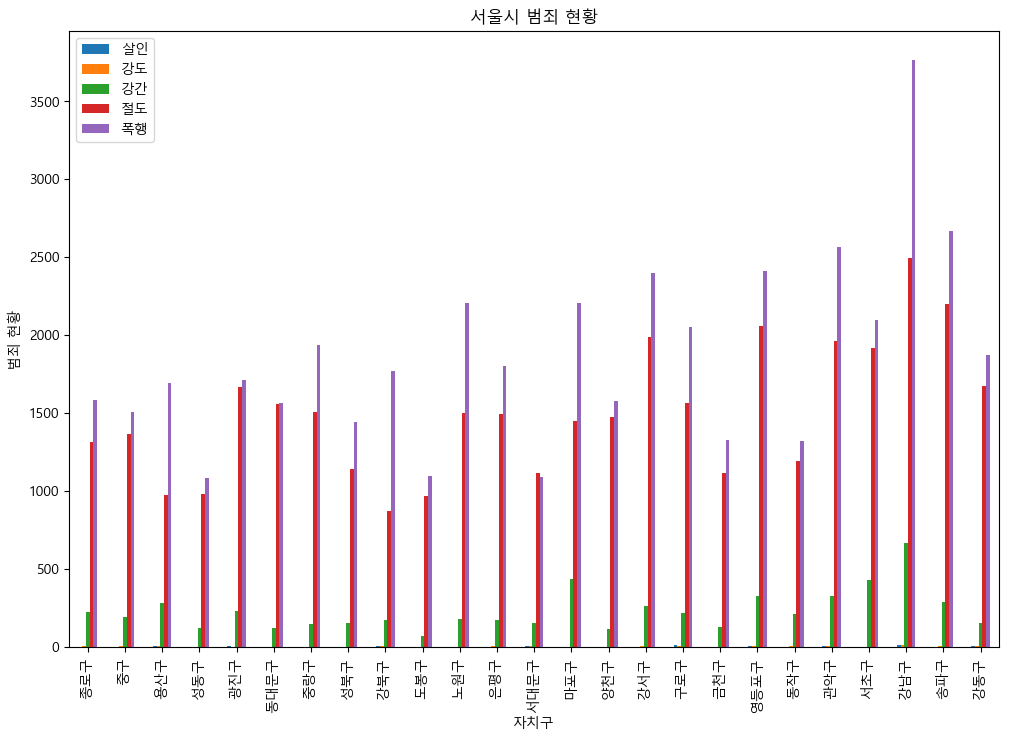

In [85]:
# 서울시 범죄 현황 막대그래프

seoul_crime_df.plot(kind = 'bar', figsize=(12, 8));

plt.title('서울시 범죄 현황');
plt.ylabel('범죄 현황');

<Axes: ylabel='자치구'>

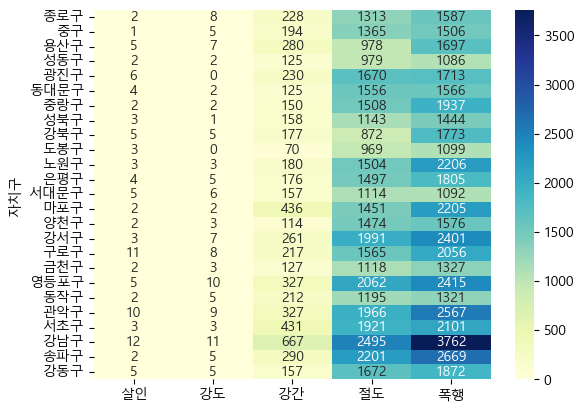

In [86]:
# 히트맵
sns.heatmap(seoul_crime_df, cmap='YlGnBu', annot=True, fmt='d')

<Axes: xlabel='자치구'>

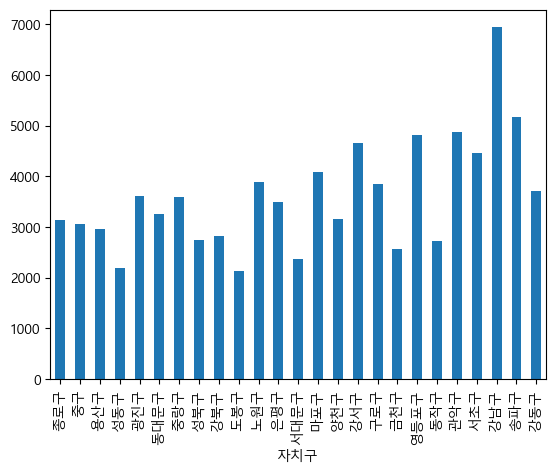

In [87]:
# 서울시 범죄 건수 총합 그래프
seoul_total_df = seoul_crime_df.sum(axis=1)
seoul_total_df.plot(kind='bar')

In [88]:
col_sums = seoul_crime_df.sum(axis=0)
all_sum = col_sums.sum()

# 5대 범죄 건수 비율
col_ratios = col_sums / all_sum


print('각 범죄 건수의 합:\n', col_sums) # (ex: 절도 건수 합계, 폭행 건수 합계 등)
print('\n5대 범죄 건수 비율:\n', col_ratios)

각 범죄 건수의 합:
 살인      104
강도      117
강간     5816
절도    37579
폭행    46783
dtype: int64

5대 범죄 건수 비율:
 살인    0.001150
강도    0.001294
강간    0.064337
절도    0.415702
폭행    0.517517
dtype: float64


- 서울시 또한 절도와 폭행 건수가 전체 비율의 93.32%를 차지하고 있다.
- 처음에 살펴본 전국 데이터에서는 절도 비율이 높았는데, 서울시 데이터에서는 절도보다 폭행 비율이 더 높게 나타났다.
- 서울시 범죄 현황 데이터를 살펴봤을 때 강남구가 가장 많고, 그 다음으로는 송파구, 관악구, 영등포구 순으로 많다.

# 서울시 5대 범죄 발생 장소 분석

In [126]:
crime_place_df = pd.read_csv('서울_범죄_발생_장소.csv')

# 분석에 필요 없는 데이터 제거
crime_place_df = crime_place_df.rename(columns = crime_place_df.iloc[1])
crime_place_df = crime_place_df.drop(['범죄별(1)', '소계'], axis=1)
crime_place_df = crime_place_df.drop([0, 1, 2])
crime_place_df.rename(columns={'범죄별(2)': '범죄명'}, inplace=True)
crime_place_df.rename(columns={'아파트 연립다세대': '아파트'}, inplace=True)
crime_place_df = crime_place_df.replace('-', 0)
crime_place_df.set_index('범죄명', inplace=True)
crime_place_df = crime_place_df.astype('int')

crime_place_df

,아파트,단독주택,노상,상점,숙박업소 목욕탕,유흥접객업소,사무실,역 대합실,교통수단,유원지,학교,금융기관,기타
범죄명,,,,,,,,,,,,,
살인,30,26,17,2,0,5,5,2,1,1,0,0,15
강도,12,11,39,16,2,6,5,1,2,0,0,1,22
강간강제추행,551,578,950,191,277,679,152,178,829,68,47,4,1312
절도,2886,1579,11442,8991,337,1684,420,348,1007,487,189,578,7631
폭력,6302,5712,16872,1356,364,3565,1048,544,1058,406,192,65,9299


- 5대 범죄 중 건수가 가장 많았던 절도와 폭력이 발생한 장소를 살펴보니 '노상'에서 다른 곳들에 비해 훨씬 높게 나타났다.
- 절도는 노상 다음으로는 상점에서 범죄가 많이 발생한다.
- 폭력은 노상 다음으로는 아파트, 단독주택에서 많이 발생한다.

# 서울시 인구 수 분석

In [142]:
population_df = pd.read_csv('서울_인구.csv')

population_df = population_df.rename(columns = population_df.iloc[0]).drop([0])
population_df = population_df.drop('항목', axis = 1)
population_df = population_df.astype({'합계' : 'int'}) # 문자열 타입 수치형으로 변경

# 구별로 묶은 후 합계 구한 뒤 새로운 데이터프레임에 저장
pop_df = population_df.groupby('동별(1)')['합계'].sum().reset_index()

pop_df.columns = ['자치구', '총 인구수']
pop_df.set_index('자치구', inplace = True)

pop_df

,총 인구수
자치구,
강남구,546291
강동구,462453
강북구,294804
강서구,569978
관악구,500582
광진구,351959
구로구,416815
금천구,242076
노원구,504423


<Axes: xlabel='자치구'>

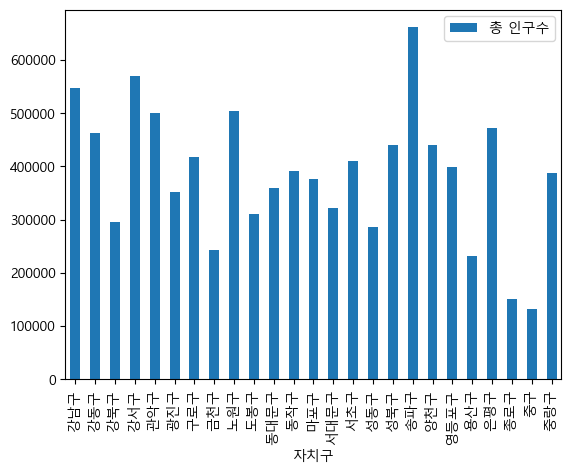

In [143]:
pop_df.plot(kind='bar')

- 인구가 가장 많은 건 송파구, 강서구, 강남구 순이다.

## 서울의 범죄 건수와 인구수 상관관계 파악

In [144]:
seoul_crime_df['총 범죄 건수'] = seoul_total_df

seoul_crime_df.head()

pop_df.head()

,살인,강도,강간,절도,폭행,총 범죄 건수
자치구,,,,,,
종로구,2,8,228,1313,1587,3138
중구,1,5,194,1365,1506,3071
용산구,5,7,280,978,1697,2967
성동구,2,2,125,979,1086,2194
광진구,6,0,230,1670,1713,3619


,총 인구수
자치구,
강남구,546291
강동구,462453
강북구,294804
강서구,569978
관악구,500582


In [146]:
# 처음에 알아본 서울시 범죄 현황 데이터 + 서울시 인구수 데이터 합치기

seoul_pop_df = pd.merge(seoul_crime_df, pop_df, on = '자치구')
seoul_pop_df = seoul_pop_df.sort_values('총 범죄 건수', ascending = False)

seoul_pop_df

,살인,강도,강간,절도,폭행,총 범죄 건수,총 인구수
자치구,,,,,,,
강남구,12,11,667,2495,3762,6947,546291
송파구,2,5,290,2201,2669,5167,661515
관악구,10,9,327,1966,2567,4879,500582
영등포구,5,10,327,2062,2415,4819,398290
강서구,3,7,261,1991,2401,4663,569978
서초구,3,3,431,1921,2101,4459,410766
마포구,2,2,436,1451,2205,4096,375639
노원구,3,3,180,1504,2206,3896,504423
구로구,11,8,217,1565,2056,3857,416815


<Axes: >

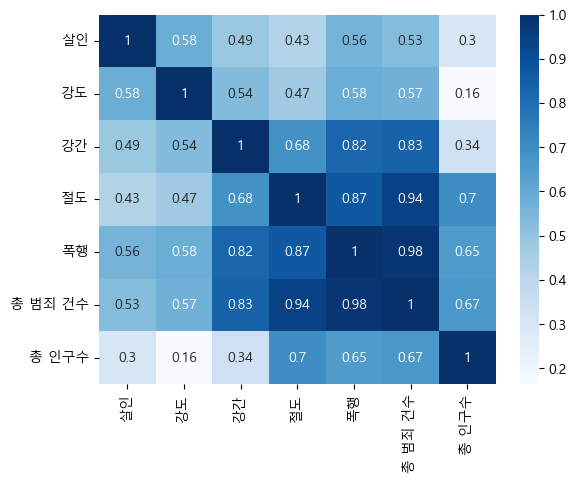

In [149]:
#  corr = correlation(상관관계)
sns.heatmap(seoul_pop_df.corr(), cmap='Blues', annot=True)

- 1에 가까울수록 완벽한 양의 상관관계를 나타내고 -1에 가까울수록 완벽한 음의 상관관계를 나타내며, 0에 가까울수록 상관 관계가 없음을 나타낸다.
- 히트맵에서 숫자가 1에 가까운 경우 양의 상관관계를 나타내며, 인구가 증가함에 따라 범죄 건수도 증가하는 경향이 있다고 할 수 있다.

# 서울시 CCTV 현황 분석

In [172]:
cctv_df = pd.read_csv('서울_CCTV.csv', encoding='CP949')
cctv_df = cctv_df[(['자치구', '안심 주소'])]  # 실질적으로 필요한 col은 '자치구'

# 자치구 별 CCTV 수량을 계산하여 새로운 DataFrame 생성
cctv_df = cctv_df['자치구'].value_counts().reset_index()
cctv_df.columns = ['자치구', 'CCTV 합계']
cctv_df.set_index('자치구', inplace=True)

cctv_df

,CCTV 합계
자치구,
강남구,7007
관악구,5366
서초구,5060
은평구,4111
광진구,4091
구로구,4050
성동구,4036
성북구,3943
양천구,3845


<Axes: xlabel='자치구'>

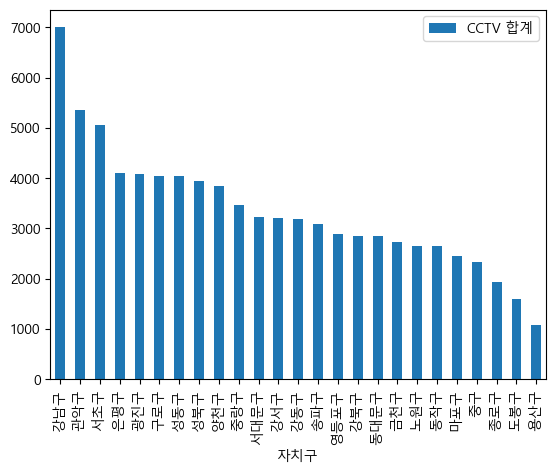

In [173]:
cctv_df.plot(kind='bar')

## 서울시 5대 범죄 현황과 CCTV 개수의 상관관계 파악

In [174]:
# 서울시 5대 범죄 현황과 자치구별 cctv 수량 합계 데이터 합치기

seoul_cctv_df = pd.merge(seoul_crime_df, cctv_df, on = '자치구')

seoul_cctv_df

,살인,강도,강간,절도,폭행,총 범죄 건수,CCTV 합계
자치구,,,,,,,
종로구,2,8,228,1313,1587,3138,1930
중구,1,5,194,1365,1506,3071,2336
용산구,5,7,280,978,1697,2967,1078
성동구,2,2,125,979,1086,2194,4036
광진구,6,0,230,1670,1713,3619,4091
동대문구,4,2,125,1556,1566,3253,2857
중랑구,2,2,150,1508,1937,3599,3471
성북구,3,1,158,1143,1444,2749,3943
강북구,5,5,177,872,1773,2832,2858


<Axes: >

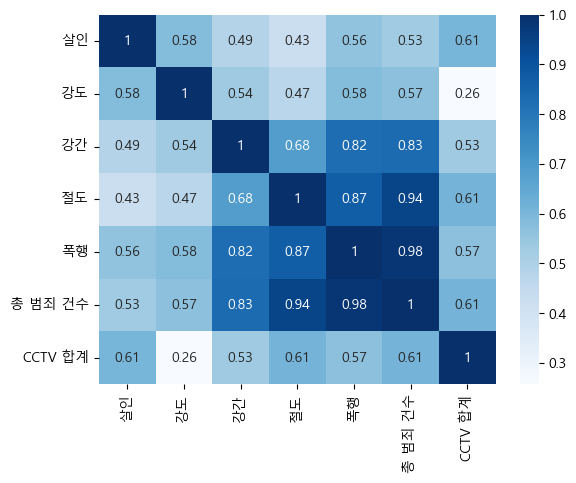

In [175]:
sns.heatmap(seoul_cctv_df.corr(), cmap='Blues', annot=True)

- 히트맵에서 숫자가 1에 가까운 경우 양의 상관관계를 나타내므로, 총 범죄 건수와 CCTV의 수량에 따른 상관관계도 어느 정도 있다고 볼 수 있다.

# 분석 내용 정리

<br>

- 시도별 데이터에서는 5대 범죄 중 절도의 건수가 가장 많았고, 그 다음으로는 폭행이 가장 많았다.
- 다른 지역들 중 경기도에서의 범죄 발생 건수가 가장 많이 나타났고, 그 다음으로는 서울이 가장 많았다.
- 범죄 발생 건수는 경기도가 가장 많지만, 자료가 많은 서울을 기준으로 데이터 분석을 진행했다.

- 서울시 또한 시도별 데이터와 마찬가지로 절도와 폭행 건수가 5대 범죄 중 대부분을 차지하고 있지만, 앞서 다룬 데이터의 수정 기간 차이 등의 이유로 약간의 차이점을 발견했다.
- 처음에 살펴본 시도별 데이터에서는 절도 건수가 폭행 건수보다 더 많았는데, 그 이후에 분석한 서울시 데이터에서는 절도보다 폭행 건수가 더 많다고 나타났다.
- 서울시 자치구 중 5대 범죄 발생 건수가 강남구에서 가장 많고, 그 다음으로는 송파구, 관악구, 영등포구 순으로 많다.

- 5대 범죄 중 건수가 가장 많았던 절도와 폭력이 발생한 장소를 살펴보니 노상에서 다른 곳들에 비해 훨씬 범죄 발생 건수가 많았다.
- 절도는 노상 다음으로는 상점에서 범죄가 많이 발생하고, 폭력은 노상 다음으로는 아파트, 단독주택에서 많이 발생한다.

- 서울시에서 인구가 가장 많은 건 송파구, 강서구, 강남구 순이다.
- 인구수에 따라 5대 범죄 발생 건수도 많은지 확인하고자 했고, 상관관계를 살펴봤을 때 어느 정도 상관이 있는 것으로 보인다.

- 서울시 CCTV 데이터를 살펴보니 강남구, 관악구, 서초구 순으로 CCTV 개수가 많았다.
- CCTV 개수와 5대 범죄 발생 건수도 상관관계가 있는지 파악하고자 했고, 히트맵을 통해 상관관계를 살펴봤을 때 어느 정도 상관이 있는 것으로 보인다.